In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
%matplotlib inline

### Load the weather data and look at the first few rows to identify the type of data and features

In [2]:
aus_df = pd.read_csv('data/weatherAUS.csv', sep=';')

/opt/anaconda3/envs/rain_project/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Check the shape and information of the dataframe.

In [3]:
print(aus_df.shape)

(145460, 23)


In [4]:
print(aus_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  object 
 17  Cloud9am       89572 non-null

### Read and inspect features (columns) and the target variable from the sample rows.

In [5]:
aus_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1/12/08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2/12/08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,3/12/08,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,4/12/08,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,5/12/08,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006,7.0,8.0,17.8,29.7,No,No


In [6]:
aus_df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,21/6/17,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22/6/17,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23/6/17,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24/6/17,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,25/6/17,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


### Identify the numerical and categorical attributes from the data type of each column.

In [7]:
aus_df.describe().round(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,89572.00,86102.00,143693.00,141851.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,9.00,9.00,40.20,46.70


In [8]:
aus_df.describe(include=['object']).T

,count,unique,top,freq
Date,145460,3436,12/11/13,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
Pressure3pm,130432.0,975.0,1015.3,628.0
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


In [9]:
# Check string values in Pressure3pm

lista_strings = aus_df['Pressure3pm'].tolist()
for i, elem in enumerate(lista_strings):
    try:
        lista_strings[i] = float(elem)
    except:
        lista_strings[i] = elem
    
filtered_list = filter(lambda x: type(x) != float, lista_strings)
list(filtered_list)





['1.009.555', '1.016.777']

In [10]:
# Create a function to transform string values into float
def preasure_to_float(elem):
    try:
        return float(elem)
    except:
        pattern = re.compile("(\d*)(\.(\d*))(\.(\d*))")
        if pattern.match(elem):
            elem = re.sub(r'(\d*)(\.(\d*))(\.(\d*))', r'\1\3.\5' , elem)
            return float(elem)


In [11]:
aus_df['Pressure3pm'] = aus_df['Pressure3pm'].apply(lambda x: preasure_to_float(x))

In [12]:
aus_df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Check out the summary statistics of the dataset, such as min/max, mean, and standard deviation. 

In [13]:
aus_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.19,6.40,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.22,7.12,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.36,8.48,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.47,4.19,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.61,3.79,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.04,13.61,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.04,8.92,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.66,8.81,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.88,19.03,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.54,20.80,0.0,37.0,52.0,66.0,100.0


In [14]:
aus_df.describe(include=['object']).round().T

,count,unique,top,freq
Date,145460,3436,12/11/13,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


### Check all the numerical and categorical attributes, respectively.

In [15]:
# get categorical data
cat_data = aus_df.select_dtypes(include=['object'])
categorical = cat_data.columns.tolist()

float_data = aus_df.select_dtypes(include=['float64'])
numerical = float_data.columns.tolist()

print("Categorical Features: {}".format(len(categorical)))
print(categorical)

print("Numerical Features: {}".format(len(numerical)))
print(numerical)

Categorical Features: 7
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical Features: 16
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [16]:
print("Unique num values of categoricals:")
for cat_feature in categorical:
   unique_values = len(aus_df[cat_feature].unique())
   print("{} : {}".format(cat_feature, unique_values))


Unique num values of categoricals:
Date : 3436
Location : 49
WindGustDir : 17
WindDir9am : 17
WindDir3pm : 17
RainToday : 3
RainTomorrow : 3


In [17]:
cat_null_df = pd.DataFrame(aus_df[categorical].isnull().sum())
cat_null_df.reset_index(inplace=True)
cat_null_df = cat_null_df.rename(columns = {'index':'Feature', 0:'Nulls'})
cat_null_df.drop(cat_null_df[cat_null_df['Nulls'] == 0].index, inplace = True)
print(cat_null_df)


        Feature  Nulls
2   WindGustDir  10326
3    WindDir9am  10566
4    WindDir3pm   4228
5     RainToday   3261
6  RainTomorrow   3267


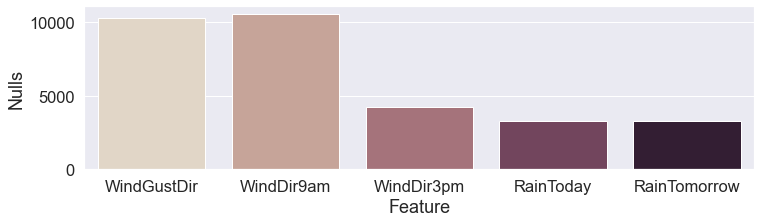

In [18]:
sns.set_style('white')
plt.figure(figsize =(12, 3))
sns.set(font_scale=1.5)
sns.barplot(x='Feature', y='Nulls', palette="ch:.25", data=cat_null_df);

In [19]:

num_null_df = pd.DataFrame(aus_df[numerical].isnull().sum())
num_null_df.reset_index(inplace=True)
num_null_df = num_null_df.rename(columns = {'index':'Feature', 0:'Nulls'})
num_null_df.drop(num_null_df[num_null_df['Nulls'] == 0].index, inplace = True)
print(num_null_df)

          Feature  Nulls
0         MinTemp   1485
1         MaxTemp   1261
2        Rainfall   3261
3     Evaporation  62790
4        Sunshine  69835
5   WindGustSpeed  10263
6    WindSpeed9am   1767
7    WindSpeed3pm   3062
8     Humidity9am   2654
9     Humidity3pm   4507
10    Pressure9am  15065
11    Pressure3pm  15028
12       Cloud9am  55888
13       Cloud3pm  59358
14        Temp9am   1767
15        Temp3pm   3609


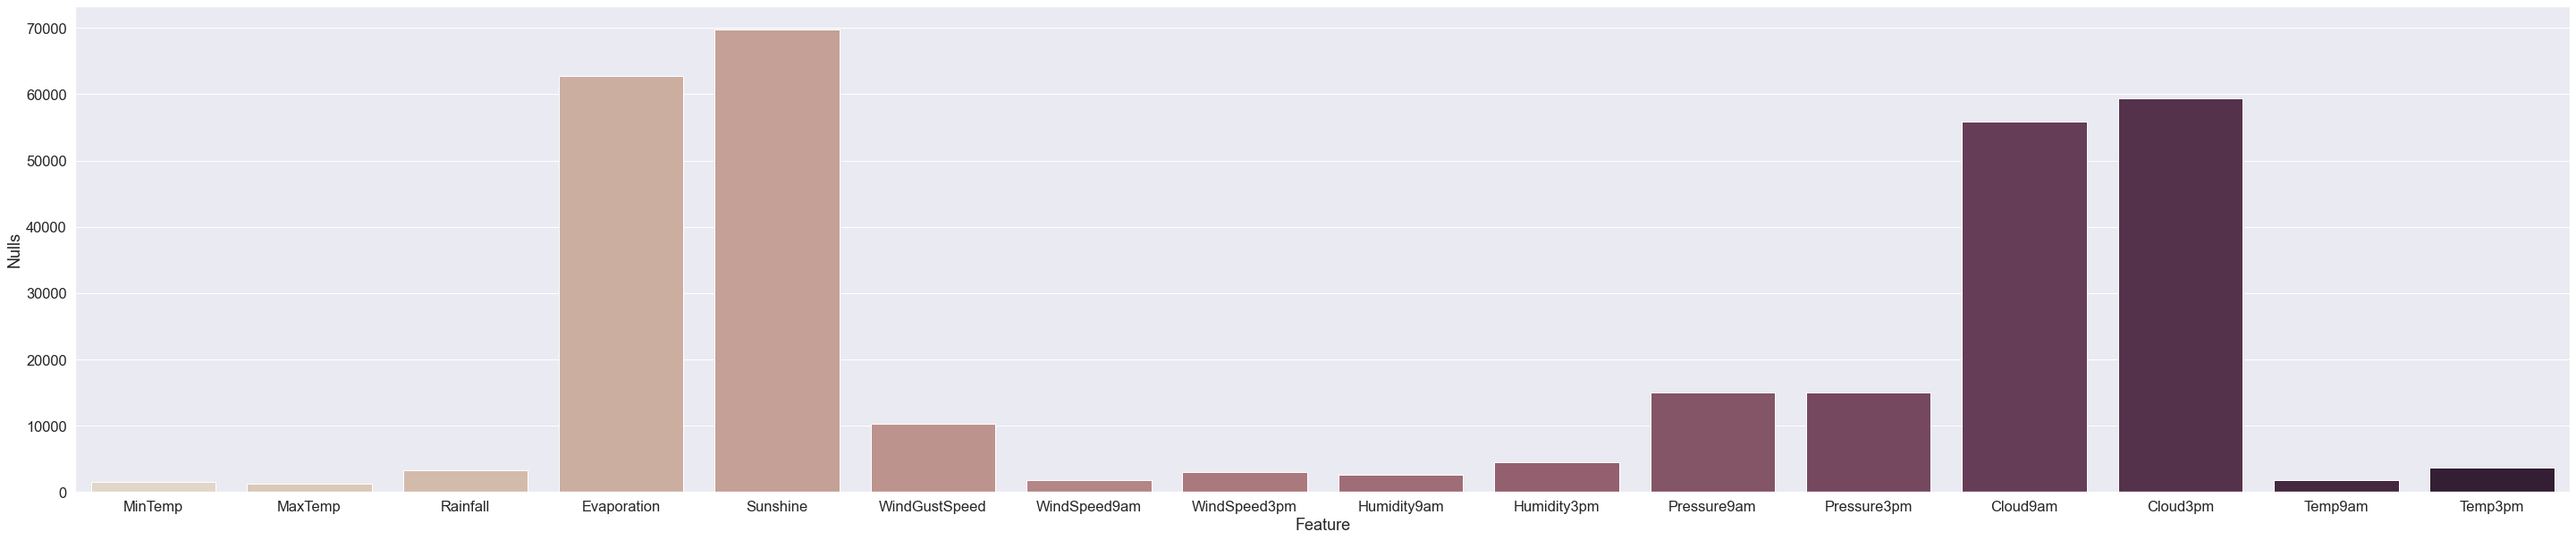

In [20]:
sns.set_style('white')
plt.figure(figsize =(50,10))
sns.set(font_scale=1.5)
sns.barplot(x='Feature', y='Nulls', palette="ch:.25", data=num_null_df);

### Check the pair plot of a few columns to understand their relationships with each other

In [21]:
columns_pairplot = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RainTomorrow']
print(columns_pairplot)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'RainTomorrow']


In [ ]:
plt.figure(figsize=(10,10))
upp_mat = np.triu(aus_df.corr())
sns.heatmap(aus_df.corr(), linewidths=0.5, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)

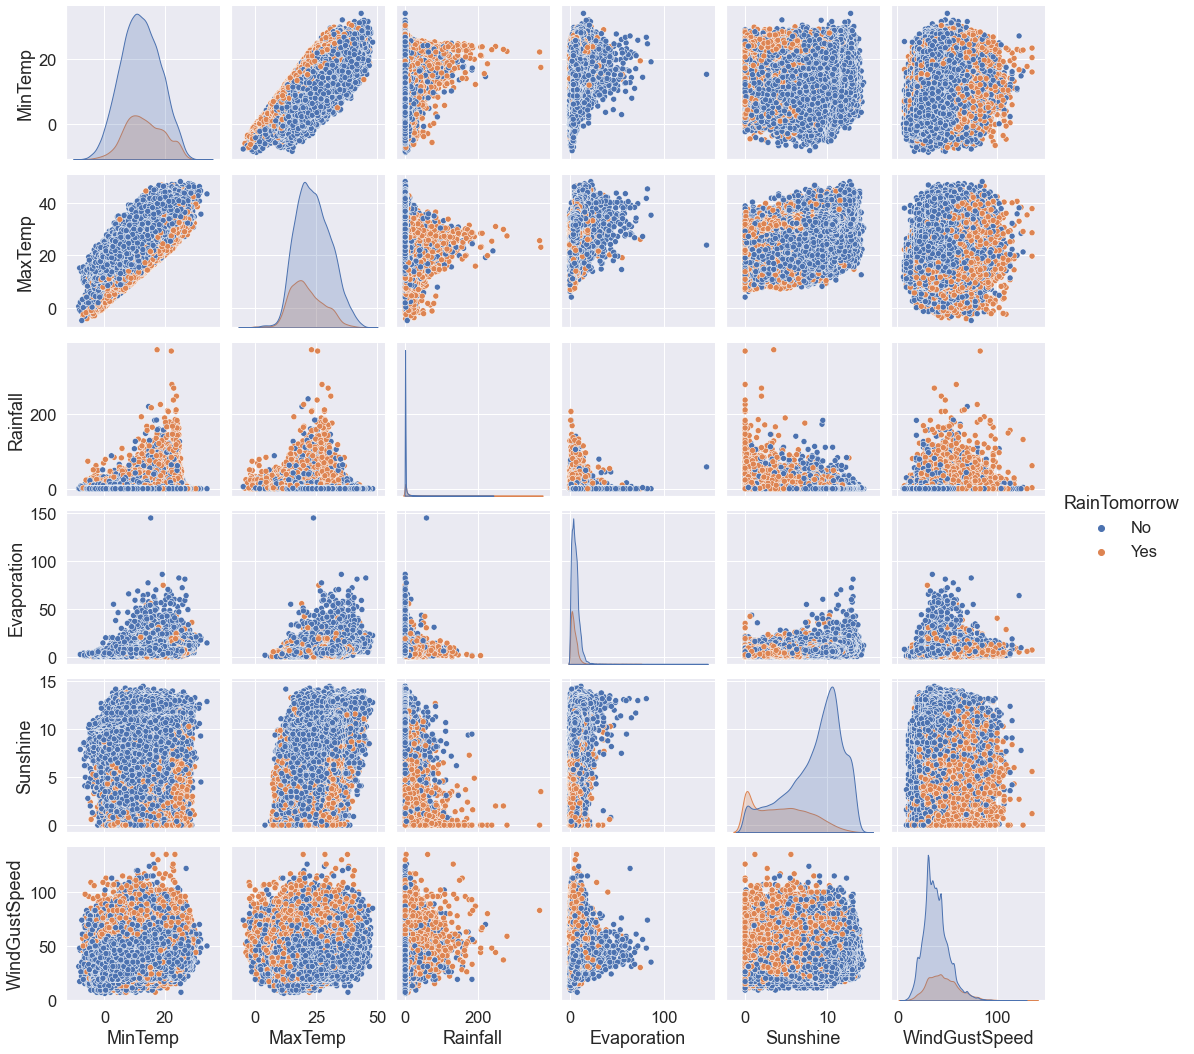

In [23]:
aus_df_pairplot = aus_df[columns_pairplot]
split_pairplot = sns.pairplot(data = aus_df_pairplot, hue='RainTomorrow')

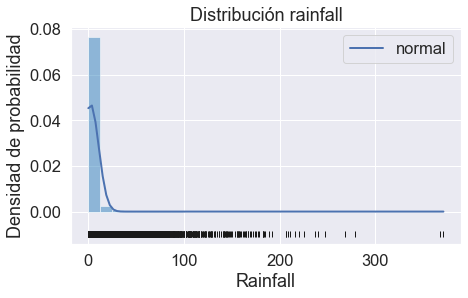

In [38]:
import statsmodels.api as sm
from scipy import stats

rainfall = aus_df['Rainfall'].dropna()
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(rainfall)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(rainfall), max(rainfall), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=rainfall, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(rainfall, np.full_like(rainfall, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución rainfall')
ax.set_xlabel('Rainfall')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

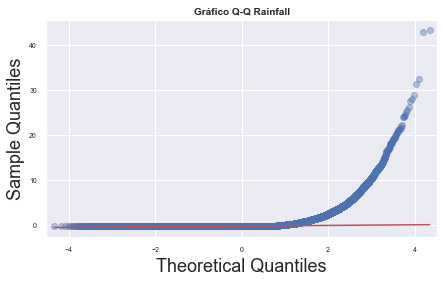

In [39]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    rainfall,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q Rainfall', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [40]:
print('Kursotis:', stats.kurtosis(rainfall))
print('Skewness:', stats.skew(rainfall))

Kursotis: 178.14577245733804
Skewness: 9.836121491711312


<AxesSubplot:>

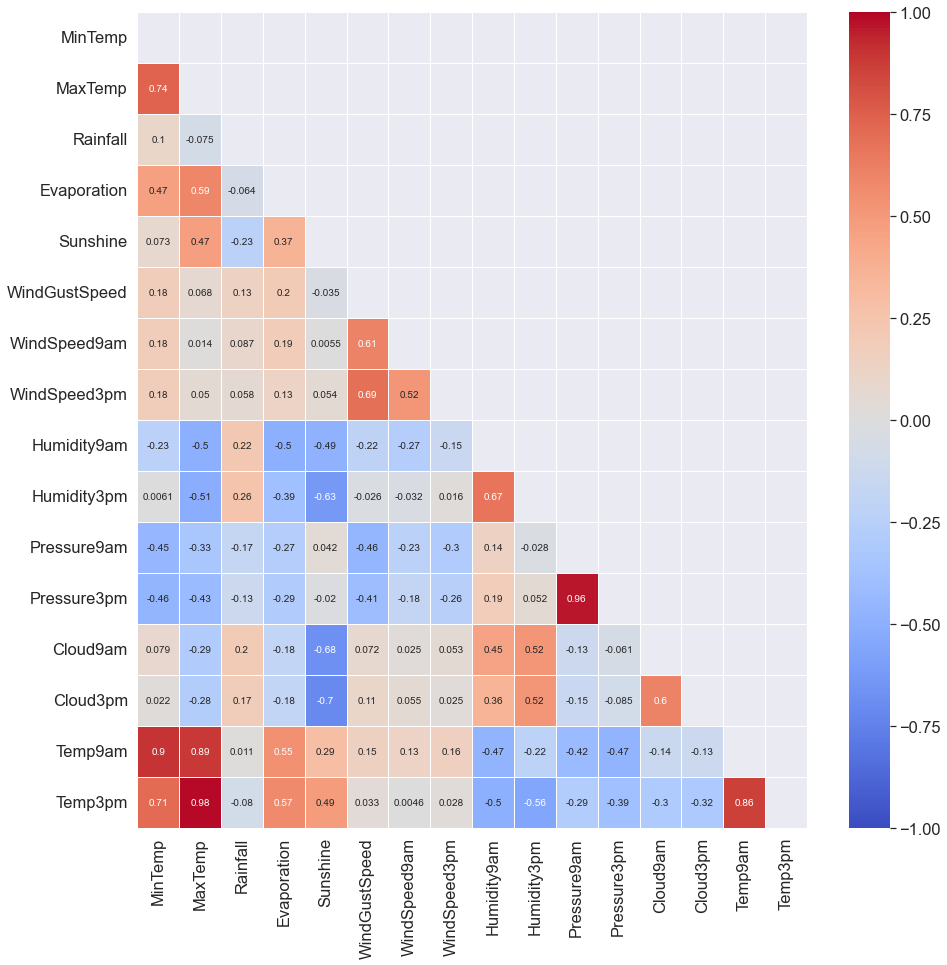

In [30]:
plt.figure(figsize=(15,15))
upp_mat = np.triu(aus_df.corr())
sns.heatmap(aus_df.corr(), linewidths=0.5, vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat, annot_kws={"size": 10})

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

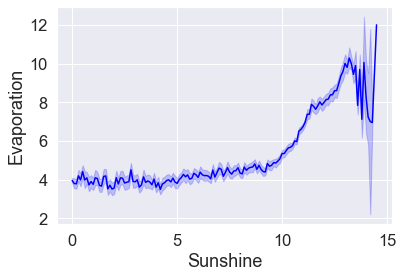

In [31]:
sns.lineplot(data=aus_df,x='Sunshine',y='Evaporation',color='blue')

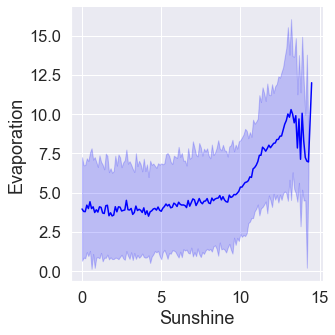

In [32]:
sns.relplot(data=aus_df,x='Sunshine',y='Evaporation',color='blue', kind="line",  ci="sd");

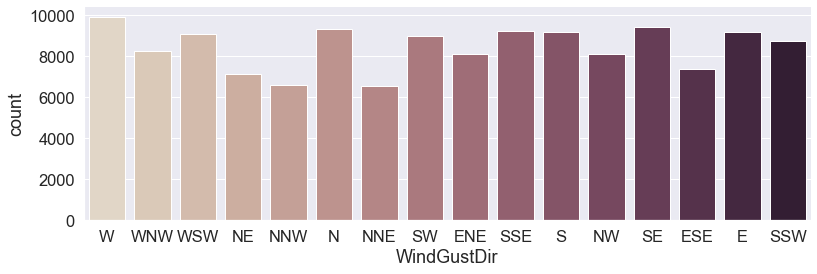

In [33]:


sns.catplot(x="WindGustDir", height=4.15, aspect=11.7/4.15, kind="count", palette="ch:.25", data=aus_df);
